In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import nawrapper as nw
import pymaster as nmt
import numpy as np
import matplotlib.pyplot as plt
from pixell import enmap, enplot

In [3]:
def eshow(m, **kwargs): 
    pl=enplot.plot(m,downgrade=8,ticks=5, **kwargs)
    enplot.show(pl)
    
! echo $OMP_NUM_THREADS

32


In [4]:
data_root = '/tigress/zequnl/cmb/data/transfun/sims/'
advact = enmap.read_fits(data_root + 'advact_00_mono.fits')

In [6]:
m_advact = nw.namap_car(maps=advact, kx=90, ky=50, kspace_apo=40)

Creating a car namap. temperature: True, polarization: True
temperature mask not specified, setting temperature mask to one.
polarization mask not specified, setting polarization mask to one.
temperature beam not specified, setting temperature beam to 1.
polarization beam not specified, setting P beam to 1.
Applying a k-space filter (kx=90, ky=50, apo=40), unpixwin: True
Computing spherical harmonics.



I'm assuming these maps have delta function beams, do not need any kind of mask or apodization, but **require the pixel window corection** (as maybe the above diagnostic information can tell you). We'll be computing the combination of pixel window with k-space filter.

In [8]:
binfile = f'/tigress/zequnl/cmb/data/from_choi/binning/BIN_ACTPOL_50_4_SC_low_ell'
bins = nw.read_bins(binfile, is_Dell=True)
Cb = nw.compute_spectra(m_advact, m_advact, bins=bins)

In [13]:
ps = np.genfromtxt('/tigress/zequnl/cmb/data/transfun/sims/ps_simple.txt',
                  names=('ell', 'TT', 'EE', 'BB'))

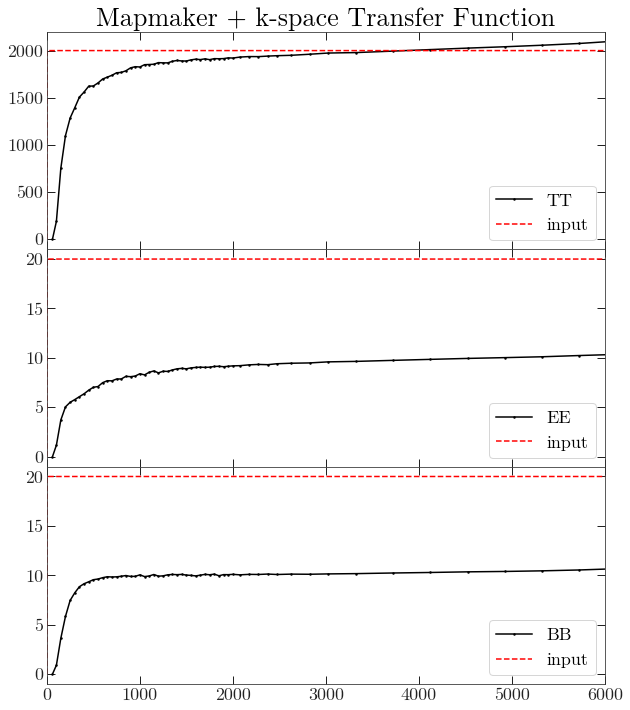

In [31]:
fig, axes = plt.subplots(3,1,figsize=(10,12), sharex=True)
for ax, XY in zip(axes, ['TT', 'EE', 'BB']):
    ax.plot(Cb['ell'], Cb[XY], label=f'{XY}')
    ax.plot(ps['ell'], ps[XY], 'r--', label='input')
    ax.set_xlim(0,6000)
    ax.legend(loc='lower right')

axes[0].set_title('Mapmaker + k-space Transfer Function')
plt.subplots_adjust(wspace=0, hspace=0)